# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [27]:
# Import the appropriate libraries with aliases
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [28]:
# EDA Question 1A solution below:
import pandas as pd
north_df = pd.read_csv('NorthCallCenter.csv')
unique_rep_count = north_df['Rep ID'].nunique()

print(f'Number of reps in the North call Center : {unique_rep_count}')


Number of reps in the North call Center : 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [29]:
# EDA Question 1B solution Below:
import pandas as pd
south_df = pd.read_csv('SouthCallCenter.csv')
unique_rep_count = south_df['Rep ID'].nunique()

print(f'Number of reps in the South call Center : {unique_rep_count}')


Number of reps in the South call Center : 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [34]:
# EDA Question 2A solution Below:
import pandas as pd
north_df = pd.read_csv('NorthCallCenter.csv')

avg_busy_min = north_df['Busy Minutes'].mean()
avg_not_ready_min = north_df['Not Ready Minutes'].mean()
avg_incoming_wait_tiem = north_df['Incoming Wait Time'].mean()
avg_during_call_wait_time = north_df['During Call Wait Time'].mean()

print(f"Avg Busy Minutes:{avg_busy_min:.2f}")
print(f"Avg Not Ready Minutes:{avg_not_ready_min:.2f}")
print(f"Avg Inoomcing Wait Time:{avg_incoming_wait_tiem:.2f}")
print(f"Avg During Call Wait Itme:{avg_during_call_wait_time:.2f}")

Avg Busy Minutes:9.99
Avg Not Ready Minutes:1.91
Avg Inoomcing Wait Time:3.05
Avg During Call Wait Itme:2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [35]:
# EDA Question 2B solution Below:
import pandas as pd
south_df = pd.read_csv('SouthCallCenter.csv')

avg_busy_min = south_df['Busy Minutes'].mean()
avg_not_ready_min = south_df['Not Ready Minutes'].mean()
avg_incoming_wait_tiem = south_df['Incoming Wait Time'].mean()
avg_during_call_wait_time = south_df['During Call Wait Time'].mean()

print(f"Avg Busy Minutes:{avg_busy_min:.2f}")
print(f"Avg Not Ready Minutes:{avg_not_ready_min:.2f}")
print(f"Avg Inoomcing Wait Time:{avg_incoming_wait_tiem:.2f}")
print(f"Avg During Call Wait Itme:{avg_during_call_wait_time:.2f}")


Avg Busy Minutes:10.05
Avg Not Ready Minutes:1.91
Avg Inoomcing Wait Time:3.00
Avg During Call Wait Itme:3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [36]:
# EDA Question 3 solution Below:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

combined_df = pd.concat([north_df, south_df])

call_counts = combined_df.groupby('Time Block')['Calls'].count()

print(call_counts)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 99
> - 10:00AM  = 56
> - 11:00AM  = 120
> - 12:00PM  = 40
> - 1:00PM   = 65
> - 2:00PM   = 73
> - 3:00PM   = 53
> - 4:00PM   = 43
> - 5:00PM   = 10



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [37]:
# Question 1 solution below
# use isnull

import pandas as pd
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

missing_data_ndf = north_df.isnull().sum()
missing_data_sdf = south_df.isnull().sum()

null_rows_ndf = north_df[north_df.isnull().any(axis= 1)]
null_rows_sdf = south_df[south_df.isnull().any(axis=1)]

print(missing_data_ndf[missing_data_ndf> 0])
print(missing_data_sdf[missing_data_sdf> 0])
print(null_rows_ndf)
print(null_rows_sdf)

Incoming Wait Time    163
dtype: int64
Incoming Wait Time    188
dtype: int64
     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
82           82  North    Sales Support   10:00 AM             Outgoing     A   
83           83  North    Sales Support   10:00 AM             Outgoing     B   
84           84  North    Sales Support   11:00 AM             Outgoing     B   
85           85  North  Product Support    9:00 AM             Outgoing     B   
86           86  North    Sales Support   10:00 AM             Outgoing     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product

In [38]:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

print(f"Shape of north DF:{north_df.shape}")
print(f"Shape of South DF:{south_df.shape}")

Shape of north DF:(245, 15)
Shape of South DF:(314, 15)


In [39]:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

north_df
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Record your answer below:

> Your Answer: There does seem to be lots of NaN values in the Incoming Wait times Column. They all seem to be related to Outgoing calls. In terms of clean up I would impute the data in that column as we are looking into which call center needs new reps to help. Having those balues averaged and filled in would help createa a more accurate representation of the average shoul dit be needed. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [40]:
# Cleaning Question 2 solution below:
import pandas as pd
north_df = pd.read_csv('NorthCallCenter.csv')

unique_sales = north_df['Sale'].unique()
print(f"Unique Sales NDF", unique_sales)

north_df['Sale']= north_df['Sale'].str.rstrip()

unique_sale_after = north_df['Sale'].unique()
print(f"Unique sales NDF after stripping spaces", unique_sale_after)

Unique Sales NDF ['NO' 'YES ' 'YES']
Unique sales NDF after stripping spaces ['NO' 'YES']


##### Record your answer by below:
> Your Answer: I stripped the extra space from the appropriate values that way the data id uniform and will not cause any issues for improper formatting 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [42]:
# Cleaning Question 3 solution below:
import pandas as pd
north_df = pd.read_csv('NorthCallCenter.csv')

duplicates = north_df[north_df.duplicated()]
print(f'Duplicates NDF:')
print(duplicates)

#count dup rows

total_dups = north_df.duplicated().sum()
print(f'Total number of dup rows NDF:{total_dups}')

Duplicates NDF:
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
Total number of dup rows NDF:0


In [43]:
import pandas as pd
south_df = pd.read_csv('SouthCallCenter.csv')

duplicates = south_df[south_df.duplicated()]
print(f'Duplicates SDF:')
print(duplicates)

#count dup rows

total_dups = south_df.duplicated().sum()
print(f'Total number of dup rows SDF:{total_dups}')

Duplicates SDF:
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
Total number of dup rows SDF:0


##### Record your answer below:
> Your Answer: There appear to be no duplicate rows in either dataset, no further action required.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

##### Record your answer below:
> Your Answer: I do not feel it would be appropriate to frop any of the data at this stage. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [44]:
# Create dataframe for the entire company named df
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

df = pd.concat([north_df, south_df],ignore_index=True)
print(f"Shape of combined DF:", df.shape)
print(df.head())



Shape of combined DF: (559, 15)
   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0     

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [45]:
# Manipulation Question solution below:
calls_summary = df.groupby(['Rep ID','Branch'])['Calls'].sum().reset_index()

sorted_calls =calls_summary.sort_values(by='Calls',ascending=False)

print(sorted_calls)

    Rep ID Branch  Calls
3    Brent  North     37
6     Eric  South     35
14   Randy  South     33
15   Sandy  South     32
8    Helga  South     31
13   Lilly  North     30
7   George  South     29
12    Kate  South     29
18    Todd  North     29
5     Duke  North     29
11    Karl  South     28
9      Joe  North     26
17   Susan  South     26
10    Josh  South     26
16  Sharon  South     25
4      Cam  North     24
19  Xander  North     24
1   Amanda  North     23
2     Andy  North     23
0    Alice  South     20


In [46]:
import pandas as pd

calls_summary = df.groupby(['Rep ID', 'Branch'])['Calls'].sum().reset_index()
top_reps = calls_summary.loc[calls_summary.groupby('Branch')['Calls'].idxmax()]

print(top_reps)

  Rep ID Branch  Calls
3  Brent  North     37
6   Eric  South     35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch =  Brent North 37 calls
- South Branch = Eric South   35 Calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [47]:
# Manipulation Question 2 solution below:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')

total_calls_ndf = north_df['Incoming or Outgoing'].count()

print(total_calls_ndf)

245


In [50]:
north_df =pd.read_csv('NorthCallCenter.csv')

Total_abandoned_ndf = north_df[north_df['Abandoned']== 1].count()
Total_abadoned_calls_ndf = north_df[north_df['Abandoned']== 1].shape[0]

print(Total_abandoned_ndf)
print(Total_abadoned_calls_ndf)

Unnamed: 0               7
Branch                   7
Call Purpose             7
Time Block               7
Incoming or Outgoing     7
Queue                    7
Rep ID                   7
Sale                     7
Lost Call                7
Abandoned                7
Busy Minutes             7
Not Ready Minutes        7
Incoming Wait Time       3
During Call Wait Time    7
Calls                    7
dtype: int64
7


In [51]:
north_df = pd.read_csv('NorthCallCenter.csv')

total_calls_ndf = north_df.shape[0]
Total_abadoned_calls_ndf = north_df[north_df['Abandoned'] == 1].shape[0]

if total_calls_ndf > 0:
    Avg_abandinment_rate = (Total_abadoned_calls_ndf/total_calls_ndf)*100
else:
    Avg_abandinment_rate = 0

print(f'Avg Abandonment Rate:{Avg_abandinment_rate:.2f}%')



Avg Abandonment Rate:2.86%


In [52]:
import pandas as pd

south_df = pd.read_csv('SouthCallCenter.csv')

total_calls_sdf = south_df['Incoming or Outgoing'].count()

print(total_calls_sdf)

Total_abandoned_sdf = south_df[south_df['Abandoned']== 1].count()
Total_abadoned_calls_sdf = south_df[south_df['Abandoned']== 1].shape[0]

print(Total_abandoned_sdf)
print(Total_abadoned_calls_sdf)

314
Unnamed: 0               4
Branch                   4
Call Purpose             4
Time Block               4
Incoming or Outgoing     4
Queue                    4
Rep ID                   4
Sale                     4
Lost Call                4
Abandoned                4
Busy Minutes             4
Not Ready Minutes        4
Incoming Wait Time       1
During Call Wait Time    4
Calls                    4
dtype: int64
4


In [53]:
south_df = pd.read_csv('SouthCallCenter.csv')

total_calls_sdf = south_df.shape[0]
Total_abadoned_calls_sdf = south_df[south_df['Abandoned'] == 1].shape[0]

if total_calls_sdf > 0:
    Avg_abandinment_rate = (Total_abadoned_calls_sdf/total_calls_sdf)*100
else:
    Avg_abandinment_rate = 0

print(f'Avg Abandonment Rate:{Avg_abandinment_rate:.2f}%')

Avg Abandonment Rate:1.27%


In [55]:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd. read_csv('SouthCallCenter.csv')

df = pd.concat([north_df,south_df], ignore_index=True)

Total_calls_company = df.shape[0]

Total_abandondoned_company = df[df['Abandoned'] == 1].shape[0]

print(f'Total calls company wide:{Total_calls_company}')
print(f'Total Abandoned calls company wide:{Total_abandondoned_company}')

Total calls company wide:559
Total Abandoned calls company wide:11


In [56]:
if Total_calls_company > 0:
    Avg_abandinment_rate = (Total_abandondoned_company/Total_calls_company)*100
else:
    Avg_abandinment_rate = 0

print(f'Average Abandonamet Rate Comapny wide:{Avg_abandinment_rate:.2f}%')

Average Abandonamet Rate Comapny wide:1.97%


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.06% 
- South Branch = 1.27 %
- Company Wide = 1.97 %
- Do any of these fall out of the optimal range of 2-5%? No

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [57]:
# Manipulation Question 3 solution below:
import pandas as pd

incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']

calls_by_branch = incoming_calls.groupby('Branch').agg(
    total_calls=('Calls', 'count'),  
    answered_under_2 =('Incoming Wait Time', 'sum')  
).reset_index()

calls_by_branch['answered_under_2'] = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2].groupby('Branch')['Incoming Wait Time'].count().reset_index(drop=True)

calls_by_branch['answered_under_2_percentage'] = (
    calls_by_branch['answered_under_2'] / calls_by_branch['total_calls']
) * 100

total_calls_company = calls_by_branch['total_calls'].sum()
total_answered_under_2_company = calls_by_branch['answered_under_2'].sum()
company_quick_answer_percentage = (
    (total_answered_under_2_company / total_calls_company) * 100 
    if total_calls_company > 0 
    else 0
)

for index, row in calls_by_branch.iterrows():
    print(f"{row['Branch']} Call Center: {row['answered_under_2']:.2f}%")

print(f"Total Company: {company_quick_answer_percentage:.2f}%")



North Call Center: 33.00%
South Call Center: 48.00%
Total Company: 38.94%


In [58]:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

df = pd.concat([north_df, south_df], ignore_index=True)

answered_within_2 = df[df['Incoming Wait Time']<= 2]

Calls_per_branch = answered_within_2['Branch'].value_counts()

total_calls_company = answered_within_2.shape[0]

print('Answered within 2 by branch')
for branch, count in Calls_per_branch.items():
    print(f"{branch}:{count} calls")
print(f'Total calls answered within 2 {total_calls_company}')

Answered within 2 by branch
South:48 calls
North:33 calls
Total calls answered within 2 81


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33.00 % 48 calls
- South Branch = 48.00 % 33 calls
- Company Wide = 38.94 % 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [59]:
# Manipulation Question 4 solution below:
import pandas as pd

incoming_calls_df = df[df['Incoming or Outgoing'] == 'Incoming']

average_speed_by_branch = incoming_calls_df.groupby('Branch').agg(
    average_speed=('Incoming Wait Time', 'mean')  
).reset_index()

average_speed = incoming_calls_df['Incoming Wait Time'].mean()

for index, row in average_speed_by_branch.iterrows():
    print(f"Average speed of answer for {row['Branch']} Call Center: {row['average_speed']:.2f} seconds")


print(f"Aerage speed of answer for the Company: {average_speed:.2f} seconds")

Average speed of answer for North Call Center: 3.05 seconds
Average speed of answer for South Call Center: 3.00 seconds
Aerage speed of answer for the Company: 3.02 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 Seconds
- South Branch in seconds = 3.00 Seconds
- Company Wide in seconds = 3.02 Seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\Office Admin\AppData\Local\Temp\ipykernel_12304\2538770308.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


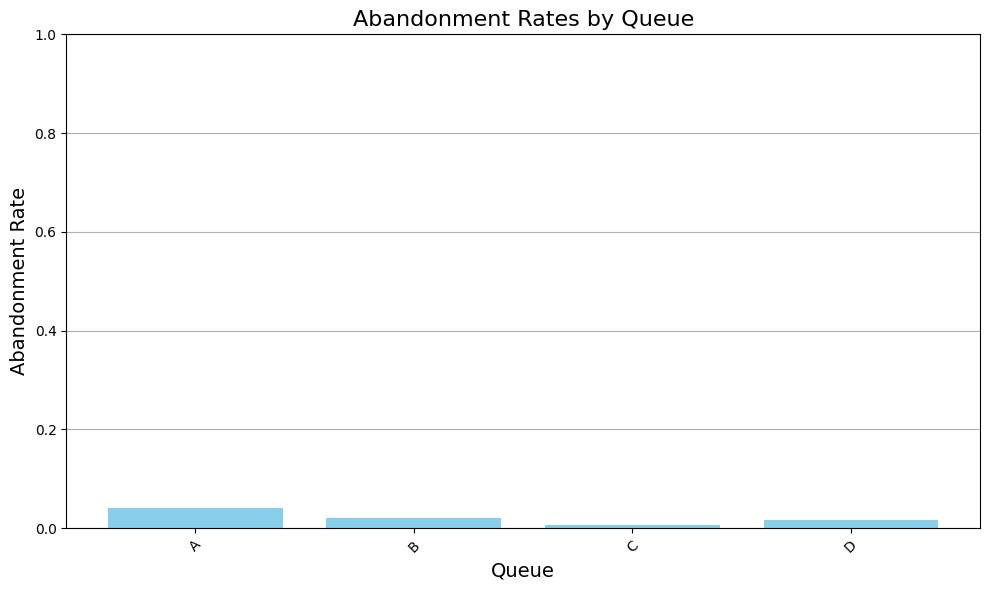

In [4]:
# Create visualization 1 here
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

North_df = pd.read_csv('NorthCallCenter.csv')
South_df = pd.read_csv('SouthCallCenter.csv')

df = pd.concat([North_df,South_df], ignore_index=True)

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

plt.figure(figsize=(10, 6))
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='skyblue')

plt.title('Abandonment Rates by Queue', fontsize=16)
plt.xlabel('Queue', fontsize=14)
plt.ylabel('Abandonment Rate', fontsize=14)
plt.ylim(0, 1)  
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()



##### Record your answer below:

> Chart style you chose and why: I chose a bar chart since we were comparing accross multiple Ques for the same piee of data. i.e. the abandonment rate. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

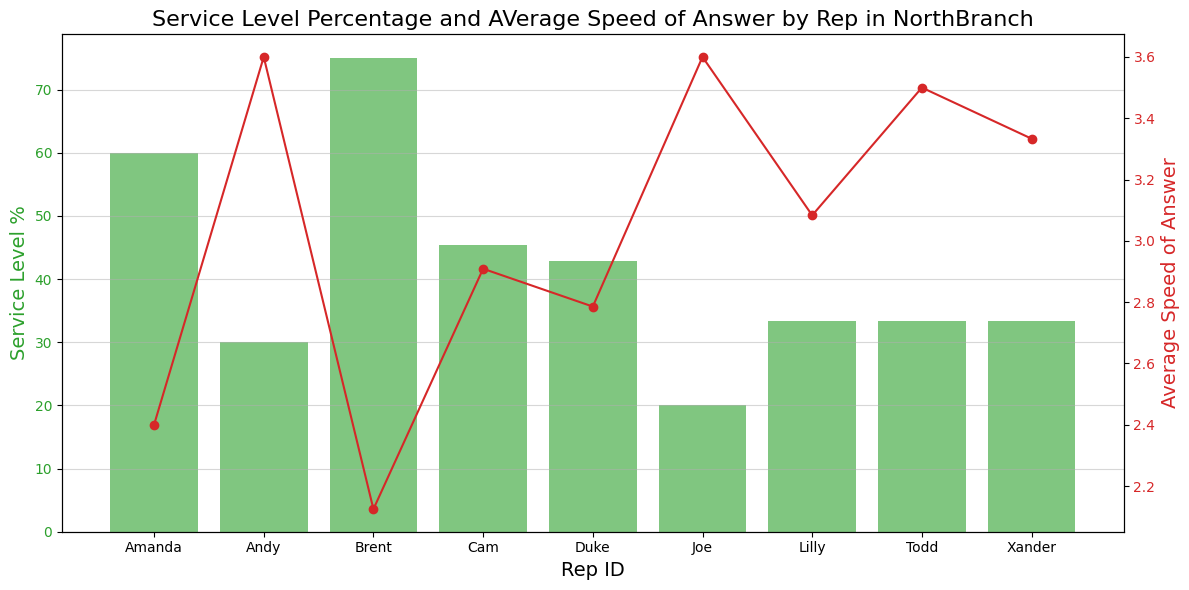

In [10]:
# Create visualization 2 here
import pandas as pd
import matplotlib.pyplot as plt

north = pd.read_csv('NorthCallCenter.csv')

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

service_level = pd.merge(service_level, north_plt, on= "Rep ID")

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_xlabel('Rep ID', fontsize=14)
ax1.set_ylabel('Service Level %', color=color, fontsize= 14)
ax1.bar(service_level['Rep ID'], service_level["Service Level %"], color=color, alpha= 0.6, label='Service Levele %')
ax1.tick_params(axis='y',labelcolor=color)

#average speed of answer
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Speed of Answer', color=color, fontsize=14)
ax2.plot(service_level['Rep ID'], service_level["Incoming Wait Time"], color=color, marker= 'o', label= 'Avg Speed of Answer')
ax2.tick_params(axis= 'y', labelcolor=color)

plt.title('Service Level Percentage and AVerage Speed of Answer by Rep in NorthBranch', fontsize=16)
ax1.grid(axis='y', alpha= 0.5)

fig.tight_layout()
plt.show()



##### Record your answer below:

> Chart style you chose and why: I chose a bar chart and line chart combo. Th Bar chart shows the service level percentage while the Line graph shows the Average soeed answered.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


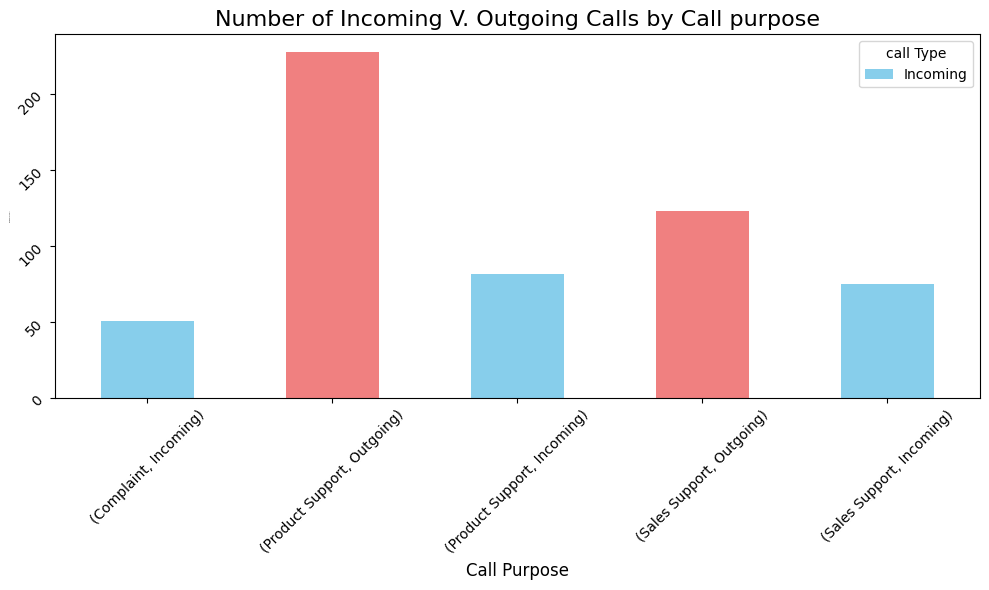

In [26]:
# Create visualization 3 here:
import pandas as pd
import matplotlib.pyplot as plt

# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

fig, ax = plt.subplots(figsize=(10, 6))

purpose_counts.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])

plt.title('Number of Incoming V. Outgoing Calls by Call purpose', fontsize=16)
plt.xlabel('Call Purpose', fontsize=12)
plt.ylabel('Number of Calls',fontsize = 0)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax.legend(['Incoming','Outgoing'], title="call Type")

plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a bar chart with differing colors for Incoming v. outgoing to see the differnce between the two fro each category. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
 Overall the South Branch based on KPI is operating more effeciently with a lower abandonment rate, higher percentage of calls ansered with in 2 seconds and they are also marginally faster when it comes to avergae speed of answer. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The North Branch could use the extra reps given that they have fewer to begin with and are short on KPI's compared to teh South Branch. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Overall I was happy with this dataset and its contents. it had everything we neede to answer the questions efficiently. I tmay have been beneficial to have The Incoing and outgoing seperated into two columns but even that was negligiable in terms of being a hindereance. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined